In [2]:
#import Pkg
using FastGaussQuadrature, QuadGK
using Distributions, StatsPlots, StatsFuns
using Interact, Plots, LaTeXStrings, WebIO, HaltonSequences

# Homework: Integration using Three Methods

[//]: # "未來：對一個 multi dimensional integration, 用 Gaussian quadrature 來做，然後與 QMC 比較。"



##  Let's redo the integration problem using QMC:

  \begin{aligned}
   I = \int_{-\infty}^\infty \exp\left(-\frac{1}{3}x^2\right)\sqrt{1+x^2} dx.
  \end{aligned}
  
  - Use quasi Monte Carlo method to compute the following integration.
  - transform the infinite domain to $[0,1]$; mind the Jacobian;
  - draw Halton sequence from $[0,1]$;
  - compute the integration with a given $n$.
- Inspect the convergence path by computing $I$ using different values $n$, and draw a graph with $n$ and $I$ on the horizontal and vertical axes, respectively.

In [2]:
g(x) = exp((-1/3) * (x^2)) * sqrt(1+x^2)
x(t) = (2*t-1) / (t-t^2)                         
J(t) = (2*(t^2)-2*t+1) / ((t^2-t)^2)       
f(t) = g(x(t))* abs(J(t))
n = 10000
step = 50
approx =[]
for count in 1:step:n
   
    hpt = Halton(2,length=count)
    push!(approx, mean(f.(hpt)))
    
end
  

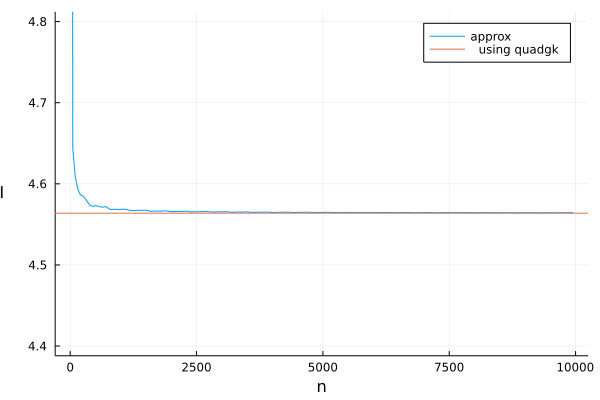

In [3]:
r=1:step:n
plot(r, approx, ylimit=[4.4, 4.8], label="approx",ylabel = "I", yguidefontrotation=-90)
hline!([quadgk(g, -Inf, Inf, rtol=1e-6)[1]], label="  using quadgk") 
xlabel!("n")


## 
Consider the following integration problem:
\begin{align}
  I = \int_a^1 c\cdot x^{-k-1}(1-x)^{k+1}dx.
\end{align}
Assume $a = 10^{-5}$, $c=10^{-9}$, and $k=2$.

### Plot (multiple) graphs of the integrand to have a basic understanding of the problem. As you can see from the equation, the integrand may be tricky when $x$ approaches 0 and when $x$ approaches 1. Therefore, plot the graphs that highlight the integrand's shape near x=0 and x=1.

In [9]:
a = 1e-5
c = 1e-9
k = 2
g(x) = c*((1-x)/x)^(k+1)

g (generic function with 1 method)

In [4]:
quadgk(g, a, 1, rtol=1e-6)[1]

4.999700036038812

In [5]:
@manipulate for c in (10,1, 10^(-1), 1e-3, 1e-5,1e-7,1e-9) , scale = ([-0.05,0.05],[.95,1.05])
    k = 2
    f(x) = c*((1-x)/x)^(k+1)
    x = range(-1.5,1.5,step=0.001)
    plot(x,f.(x),xlim = scale) 

end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["c"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :span), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text : key")))], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "click: function (){\$root.update(val)}, css: {'is-primary is-selected' : \$root.index() == val, 'interact-widget is-medium button ' : true}")))], Dict{Symbol, Any}(:attributes => ("data-bind" => "foreach : options_js"), :className => "buttons has-addons is-centered"))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[], Dict{Symbol, Any}())], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("options_js" => (Observable{Vector{OrderedDict}} with 1 listeners. Value:
OrderedDict[OrderedDict{String, Any}("key" => "10", "val" => 1, "id" => "iddzBI8g9Y"), OrderedDict{String, Any}("key" => "1", "val" => 2, "id" => "idIggVtMWB"), OrderedDict{String, Any}("key" => "0.1", "val" => 3, "id" => "idn3yNO4cU"), OrderedDict{String, Any}("key" => "0.001", "val" => 4, "id" => "idxKRIdfVJ"), OrderedDict{String, Any}("key" => "1.0e-5", "val" => 5, "id" => "idrd1t2pba"), OrderedDict{String, Any}("key" => "1.0e-7", "val" => 6, "id" => "idmDN0k2Cg"), OrderedDict{String, Any}("key" => "1.0e-9", "val" => 7, "id" => "idhkH8PpIj")], nothing), "index" => (Observable{Any} with 2 listeners. Value:
1, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\User\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\User\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\User\\.julia\\packages\\InteractBase\\Qhvxg\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\User\\.julia\\packages\\InteractBase\\Qhvxg\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\User\\.julia\\packages\\Interact\\PENUy\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("options_js" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"options_js\"]()) ? (this.valueFromJulia[\"options_js\"]=true, this.model[\"options_js\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000005afbb9e0, Task (runnable) @0x000000005afbb9e0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;

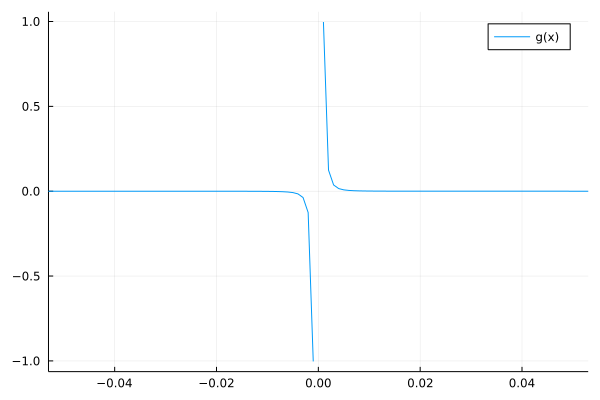

In [6]:
l = range(-1.5,1.5,step=0.001)
plot(l,g.(l),label="g(x)",xlim=[-0.05,0.05])

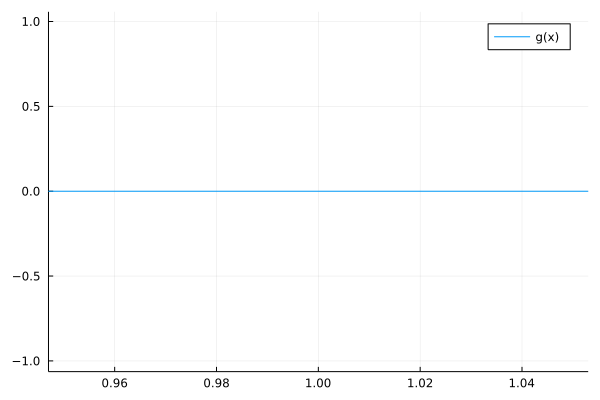

In [7]:
l = range(-1.5,1.5,step=0.001)
plot(l,g.(l),label="g(x)",xlim=[.95,1.05])

### Use the Gauss-Legendre rule to compute the integral. How many nodes are required to have a stable solution (say, five digits after the decimal point are unchanged) ? 
- Hint: A lot of nodes.

In [8]:
function GL(g::Function, n=20,a = 1e-5,b = 1)
    xi,wi = gausslegendre(n)
    x(t)=(a+b)/2 + ((b-a)/2)*t
    J=(b-a)/2
    f(t)= g(x(t))*J
    answer = sum( wi .* f.(xi))
    return answer 
end

GL (generic function with 4 methods)

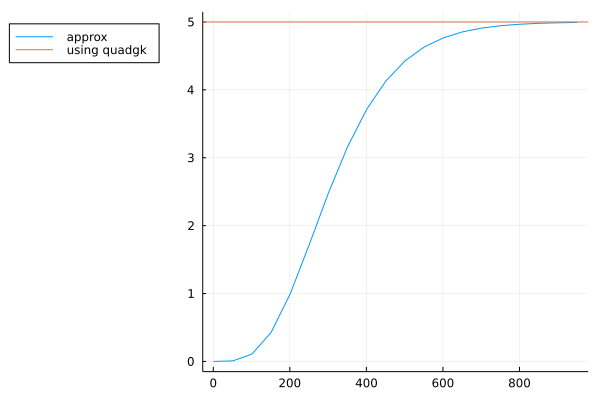

In [9]:
i= range(1,1000,step = 50)
plot(i,[GL(g,j)[1] for j in i], label="  approx", legend = :outertopleft)
hline!([quadgk(g, a, 1, rtol=1e-10)[1]], label="  using quadgk") 

In [22]:
function cal_stable_node_general(g::Function, approx_method::Function, max, error = 1e-6  )
    exact= quadgk(g, a, 1, rtol=1e-6 )[1]
    for i in 1:max
        #println(approx_method(g,i))
        if abs( approx_method(g,i) - exact ) < error
            return i
        end
    end
    println( "can't converge in ",max," nodes.")      
end

cal_stable_node_general (generic function with 2 methods)

In [11]:
cal_stable_node_general(g,GL,2000,1e-6)

1746

### Use both of the Monte Carlo method (with pseudo random numbers) and Quasi-Monte Carlo method (with the Halton sequence) to compute the integral. How long does the sequences need to be in order to have a stable solution (2 digits after the decimal point)? Which method, MC or QMC, uses smaller values of $n$?
- Hint: A very long sequence.
- Hint: The following generates a Halton sequence of length 100 with the base number=2: `using HaltonSequences;` `lds=Halton(2,100)`.

In [27]:
function monte_carlo(g::Function,n = 1000)
    sample = rand(Uniform(a ,1),n)
    return mean(g.(sample))
end

monte_carlo (generic function with 2 methods)

In [29]:
cal_stable_node_general(g, monte_carlo ,20000, 1e-2)

9953

In [39]:
function quasi_monte_carlo(g::Function,n = 1000)
    sample =Halton(2,length=n)
    return mean(g.(sample))
end

quasi_monte_carlo (generic function with 2 methods)

In [31]:
cal_stable_node_general(g,quasi_monte_carlo,20000,1e-2)

can't converge in 20000 nodes.


In [6]:
seq= Halton(2,length=1e9)
function quasi_monte_carlo_2(g::Function,n = 1000)
    return mean(g.(seq[1:n]))
end
function Dynamic_programming_ver_for_qmc(n=1000)
    if n == 100000000 return 2.806231081179406e7 
    else return Dynamic_programming_ver_for_qmc(n-1)*(n-1)/n + g(seq[n])/n
    end
end


Dynamic_programming_ver_for_qmc (generic function with 2 methods)

In [37]:
quasi_monte_carlo_2(g, 50000)


6.741877583725989

In [45]:
quasi_monte_carlo(g,100000 )

26.96833359010543

In [10]:
quadgk(g, a, 1, rtol=1e-10)[1]

4.999700036038786

In [13]:
quadgk(g, 0.00025, 1, rtol=1e-10)[1]

0.00798802638239892

In [14]:
rand(Uniform(a,0.00025),1000)

1000-element Vector{Float64}:
 3.9733400349920025e-5
 0.00013921740354441595
 8.649751095243404e-5
 0.0002413497395429464
 0.0001691348003421037
 8.171806478501323e-5
 0.00012763378719219195
 0.0001693157328214881
 0.0002205685053469112
 7.198978407969066e-5
 0.0001925269219182864
 0.00024263417131606722
 0.00017333638130514765
 ⋮
 4.303958621427212e-5
 0.00023381675677221675
 0.00015145634599996407
 0.00012852701787536197
 9.791532803660935e-5
 8.103186894349399e-5
 0.00019698236214611754
 0.00020820444369623074
 0.0001592647115163628
 2.9015501047312126e-5
 0.00018049825866119944
 0.00016069266548737342

In [22]:
function monte_carlo_limit(g::Function,n = 1000)
    sample = rand(Uniform(a,0.00025),n)
    f(x) = g(x)/(1/(0.00025-a))
    return mean(f.(sample))
end

monte_carlo_limit (generic function with 2 methods)

In [26]:
monte_carlo_limit(g, 10000000)

4.988065063501153

### Julia provides a package `QuadGK.jl` which has a function `quadgk()` that uses *adaptive quadratures* to do one-dimensional numerical integration. Use `using Pkg; Pkg.add("QuadGK.jl")` to install it, and `using QuadGK` to call it.
- Please read Section 1.3 on `Lec4 Numerical Integration - class.ipynb` to understand what is adaptive quadratures.
- Use `quadgk()` function to compute the integration.

In [20]:
quadgk(g, a, 1, rtol=1e-10)[1]

LoadError: MethodError: no method matching *(::Widget{:togglebuttons, Any}, ::Float64)
[0mClosest candidates are:
[0m  *(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m) at operators.jl:560
[0m  *([91m::StridedArray{P, N} where N[39m, ::Real) where P<:Dates.Period at C:\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.6\Dates\src\deprecated.jl:44
[0m  *([91m::Union{SparseArrays.SparseVector{Tv, Ti}, SubArray{Tv, 1, var"#s814", Tuple{Base.Slice{Base.OneTo{Int64}}}, false} where var"#s814"<:SparseArrays.AbstractSparseVector{Tv, Ti}, SubArray{Tv, 1, var"#s814", Tuple{Base.Slice{Base.OneTo{Int64}}, Int64}, false} where var"#s814"<:SparseArrays.AbstractSparseMatrixCSC{Tv, Ti}} where {Tv, Ti}[39m, ::Number) at C:\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.6\SparseArrays\src\sparsevector.jl:1448
[0m  ...

### You tried several methods to calculate the integration: The Gauss-Legendre method, the quasi-Monte Carlo method using the Halton sequence, the Monte Carlo method using random draws, and the adaptive quadrature method. How would you rank the methods from the most efficient (in terms of using a smaller number of draws/points, which usually translates to shorter run time) to the least efficient? Please explain the possible reasons behind the most and the least efficient methods.

efficient: adaptive quadrature method > Monte Carlo method > quasi-Monte Carlo method  
reason: 以本題來說 quadrature method 可以控制各點的權重，效用最高 ；對於依賴機率論的估計方法，因為要積的函數在[a,1]的區間內大部分趨近於0，基於uniform[a,1]或halton seq所生出的資料，大部分效用不高。而uniform[a,1]要比Low Discrepancy Sequences更有機會抽出較多有效的資料點，所以效用次高。